In [87]:
import pickle
import time
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import image

%matplotlib inline

In [112]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 25}
matplotlib.rc('font', **font)

In [5]:
t = time.localtime(1517284)

In [35]:
time.localtime()

time.struct_time(tm_year=2018, tm_mon=6, tm_mday=4, tm_hour=16, tm_min=32, tm_sec=57, tm_wday=0, tm_yday=155, tm_isdst=1)

In [17]:
dp = Path('data_3_8_2018/Novi_503_RawData_06-19-2017_16-54-31-0888.dat')

In [18]:
with dp.open() as f:
    lines = f.readlines()

In [19]:
df = pd.DataFrame(data=[l.split() for l in lines[18:]], columns=lines[17].split())

In [20]:
df.head()

,Timestamp,TimestampSec,TimestampUSec,Number,GazeX,GazeY,GazePointXLeft,GazePointYLeft,CamXLeft,CamYLeft,DistanceLeft,PupilLeft,ValidityLeft,GazePointXRight,GazePointYRight,CamXRight,CamYRight,DistanceRight,PupilRight,ValidityRight
0,1517284,15172,847783,0,0,0,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,4
1,1517285,15172,856117,1,0,0,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,4
2,1517286,15172,864418,2,0,0,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,4
3,1517287,15172,872752,3,0,0,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,4
4,1517288,15172,881086,4,0,0,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,4


In [22]:
gazeX, gazeY = df.GazeX, df.GazeY

In [24]:
x = pd.to_numeric(gazeX.values)

In [26]:
y = pd.to_numeric(gazeY.values)

In [46]:
x_ = x[x>0]
x_ = x_[x_<1]

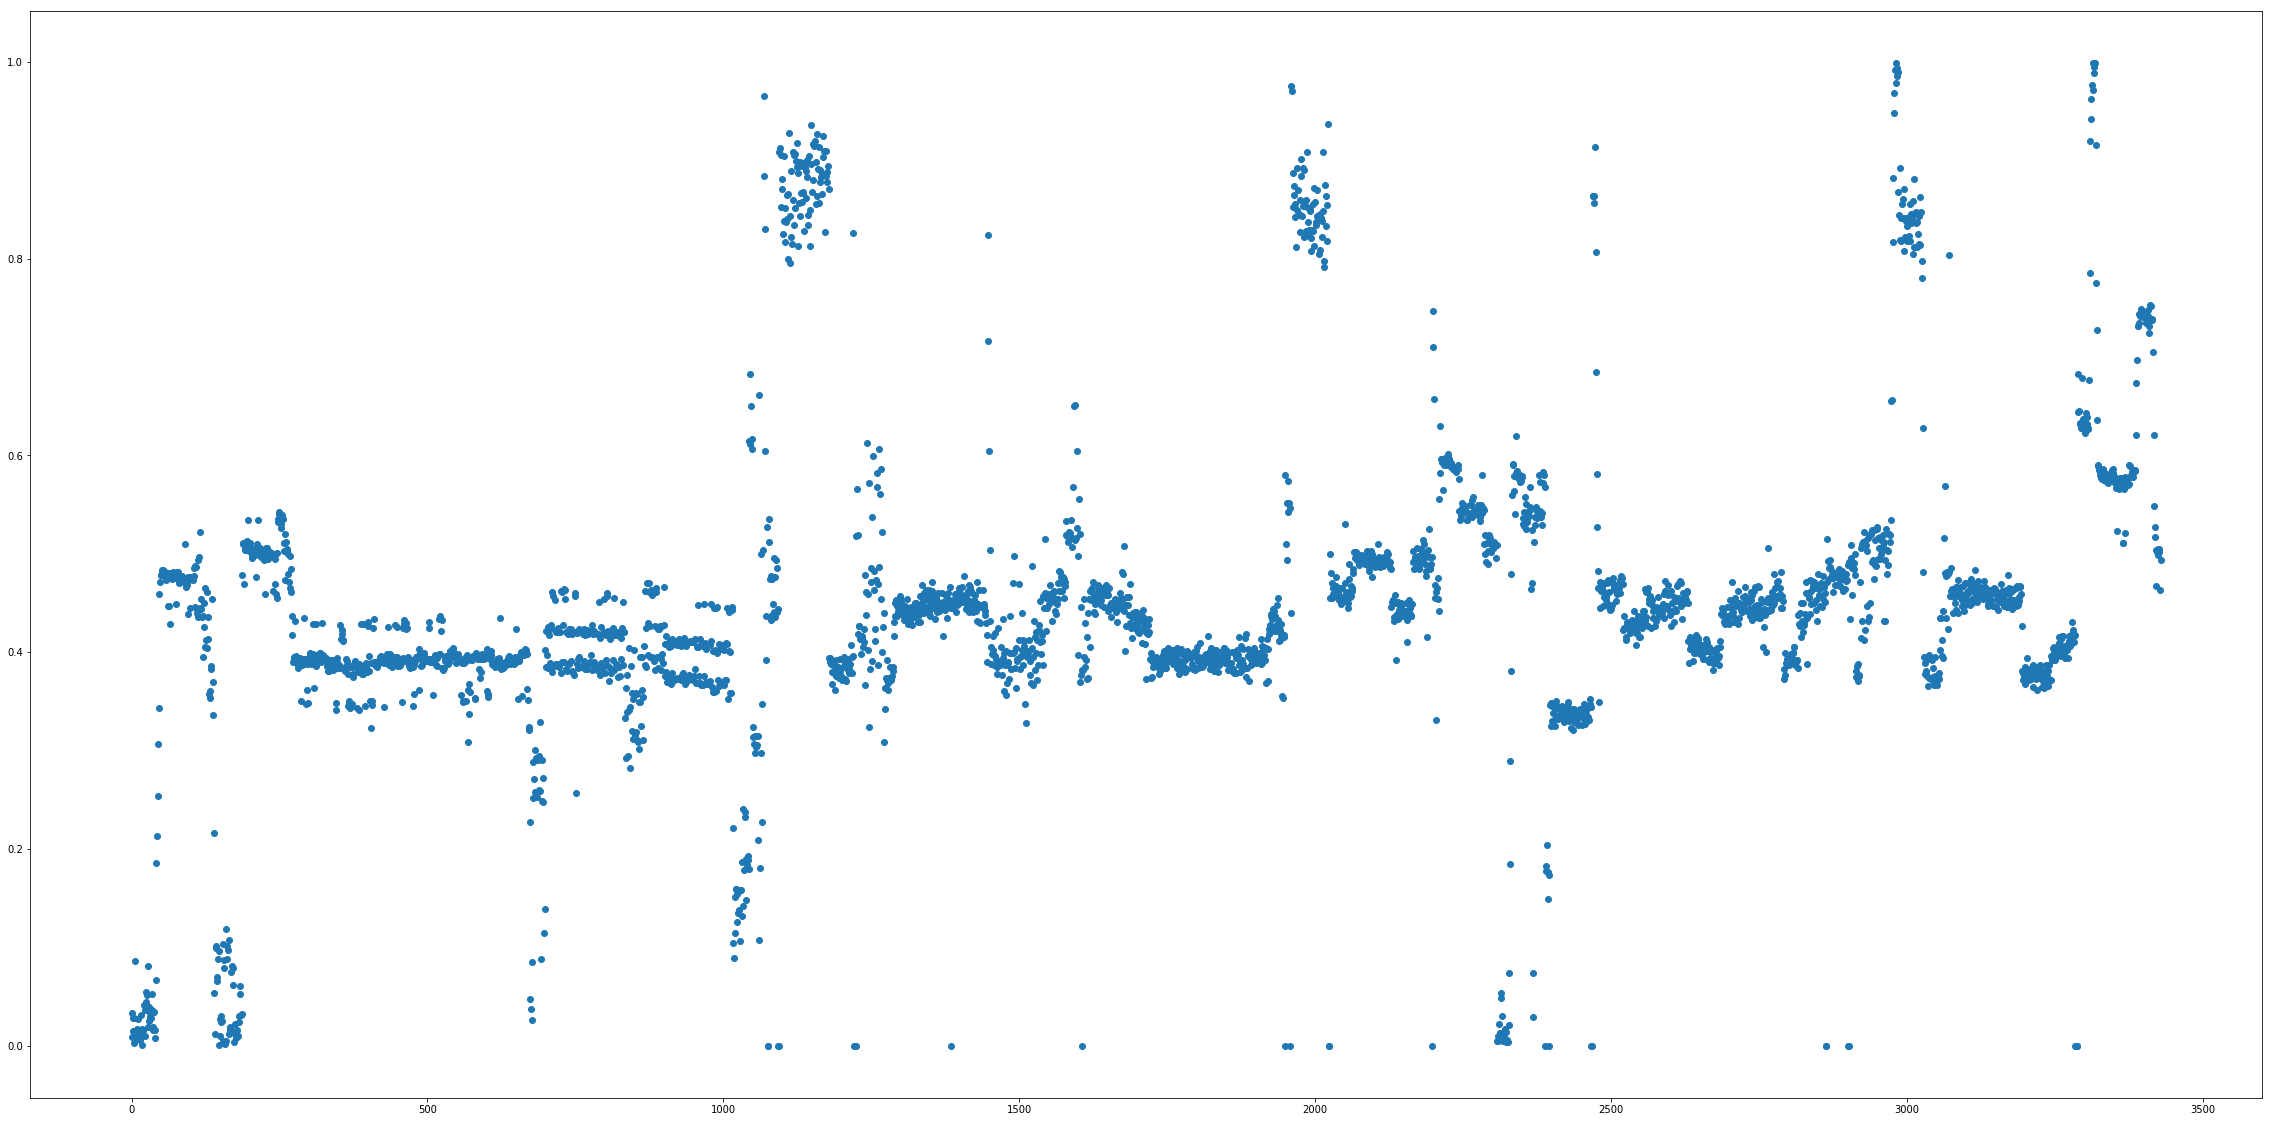

In [51]:
fig, ax = plt.subplots(figsize=(40,20))
ax.scatter(range(3430), x_[:3430])

In [67]:
fig.savefig('test.png')

In [66]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>

In [48]:
y_ = y[y>0]
y_ = y_[y_<1]

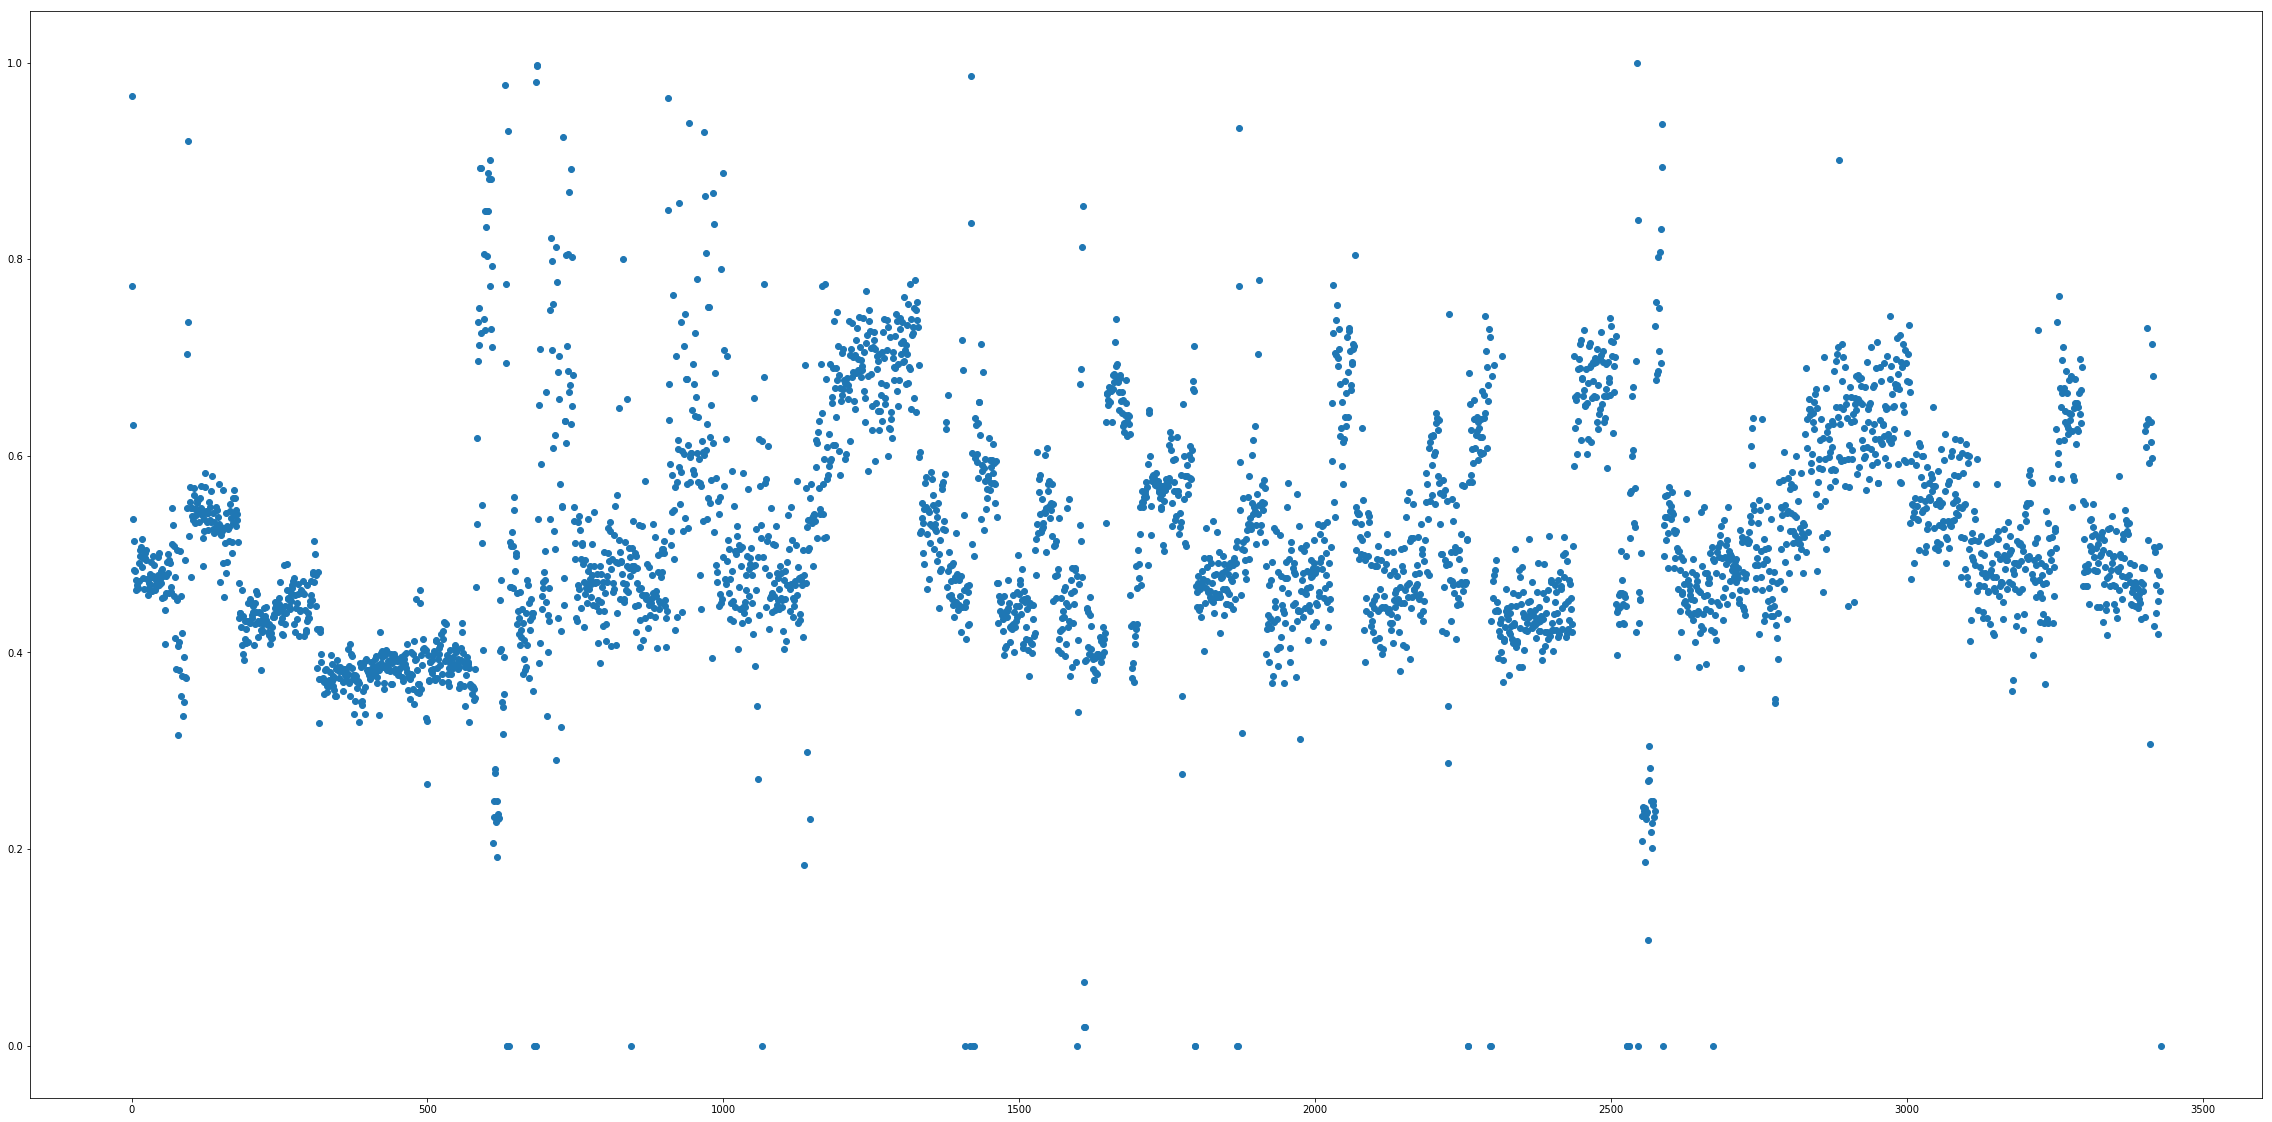

In [49]:
fig, ax = plt.subplots(figsize=(40,20))
ax.scatter(range(len(y_)), y_)

In [50]:
len(y_)

3430

In [52]:
gaze_x = x_[:3430]
gaze_y = y_

In [116]:
class PlotGazePosition:
    def __init__(self, filename):
        self.path = Path('data_3_8_2018/'+filename)
        self.gazeX = []
        self.gazeY = []
        self.name = filename.split('.')[0]
        
    def read_data(self):
        with self.path.open() as f:
            lines = f.readlines()
        df = pd.DataFrame(data=[l.split() for l in lines[18:]], columns=lines[17].split())
        x, y = pd.to_numeric(df.GazeX.values), pd.to_numeric(df.GazeY.values)
        x_ = x[x>0]
        x_ = x_[x_<1]
        y_ = y[y>0]
        y_ = y_[y_<1]
        length = min(len(x_), len(y_))
        print('Length of X is {}; length of Y is {}'.format(len(x_), len(y_)))
        self.gazeX = x_[:length]*1920
        self.gazeY = y_[:length]*1080
        return length
        
    def plot_data(self):
        length = self.read_data()
        fig, ax = plt.subplots(2,1,figsize=(20,20),sharex=True)
        ax[0].scatter(range(length), self.gazeX)
        ax[0].set_ylabel('Gaze position in X axis')
        ax[1].scatter(range(length), self.gazeY)
        ax[1].set_ylabel('Gaze position in Y axis')
        ax[1].set_xlabel('Data Samples')
        fig.savefig(self.name+'.png', bbox_inches='tight', pad_inches=0.05)

Length of X is 4550; length of Y is 3430


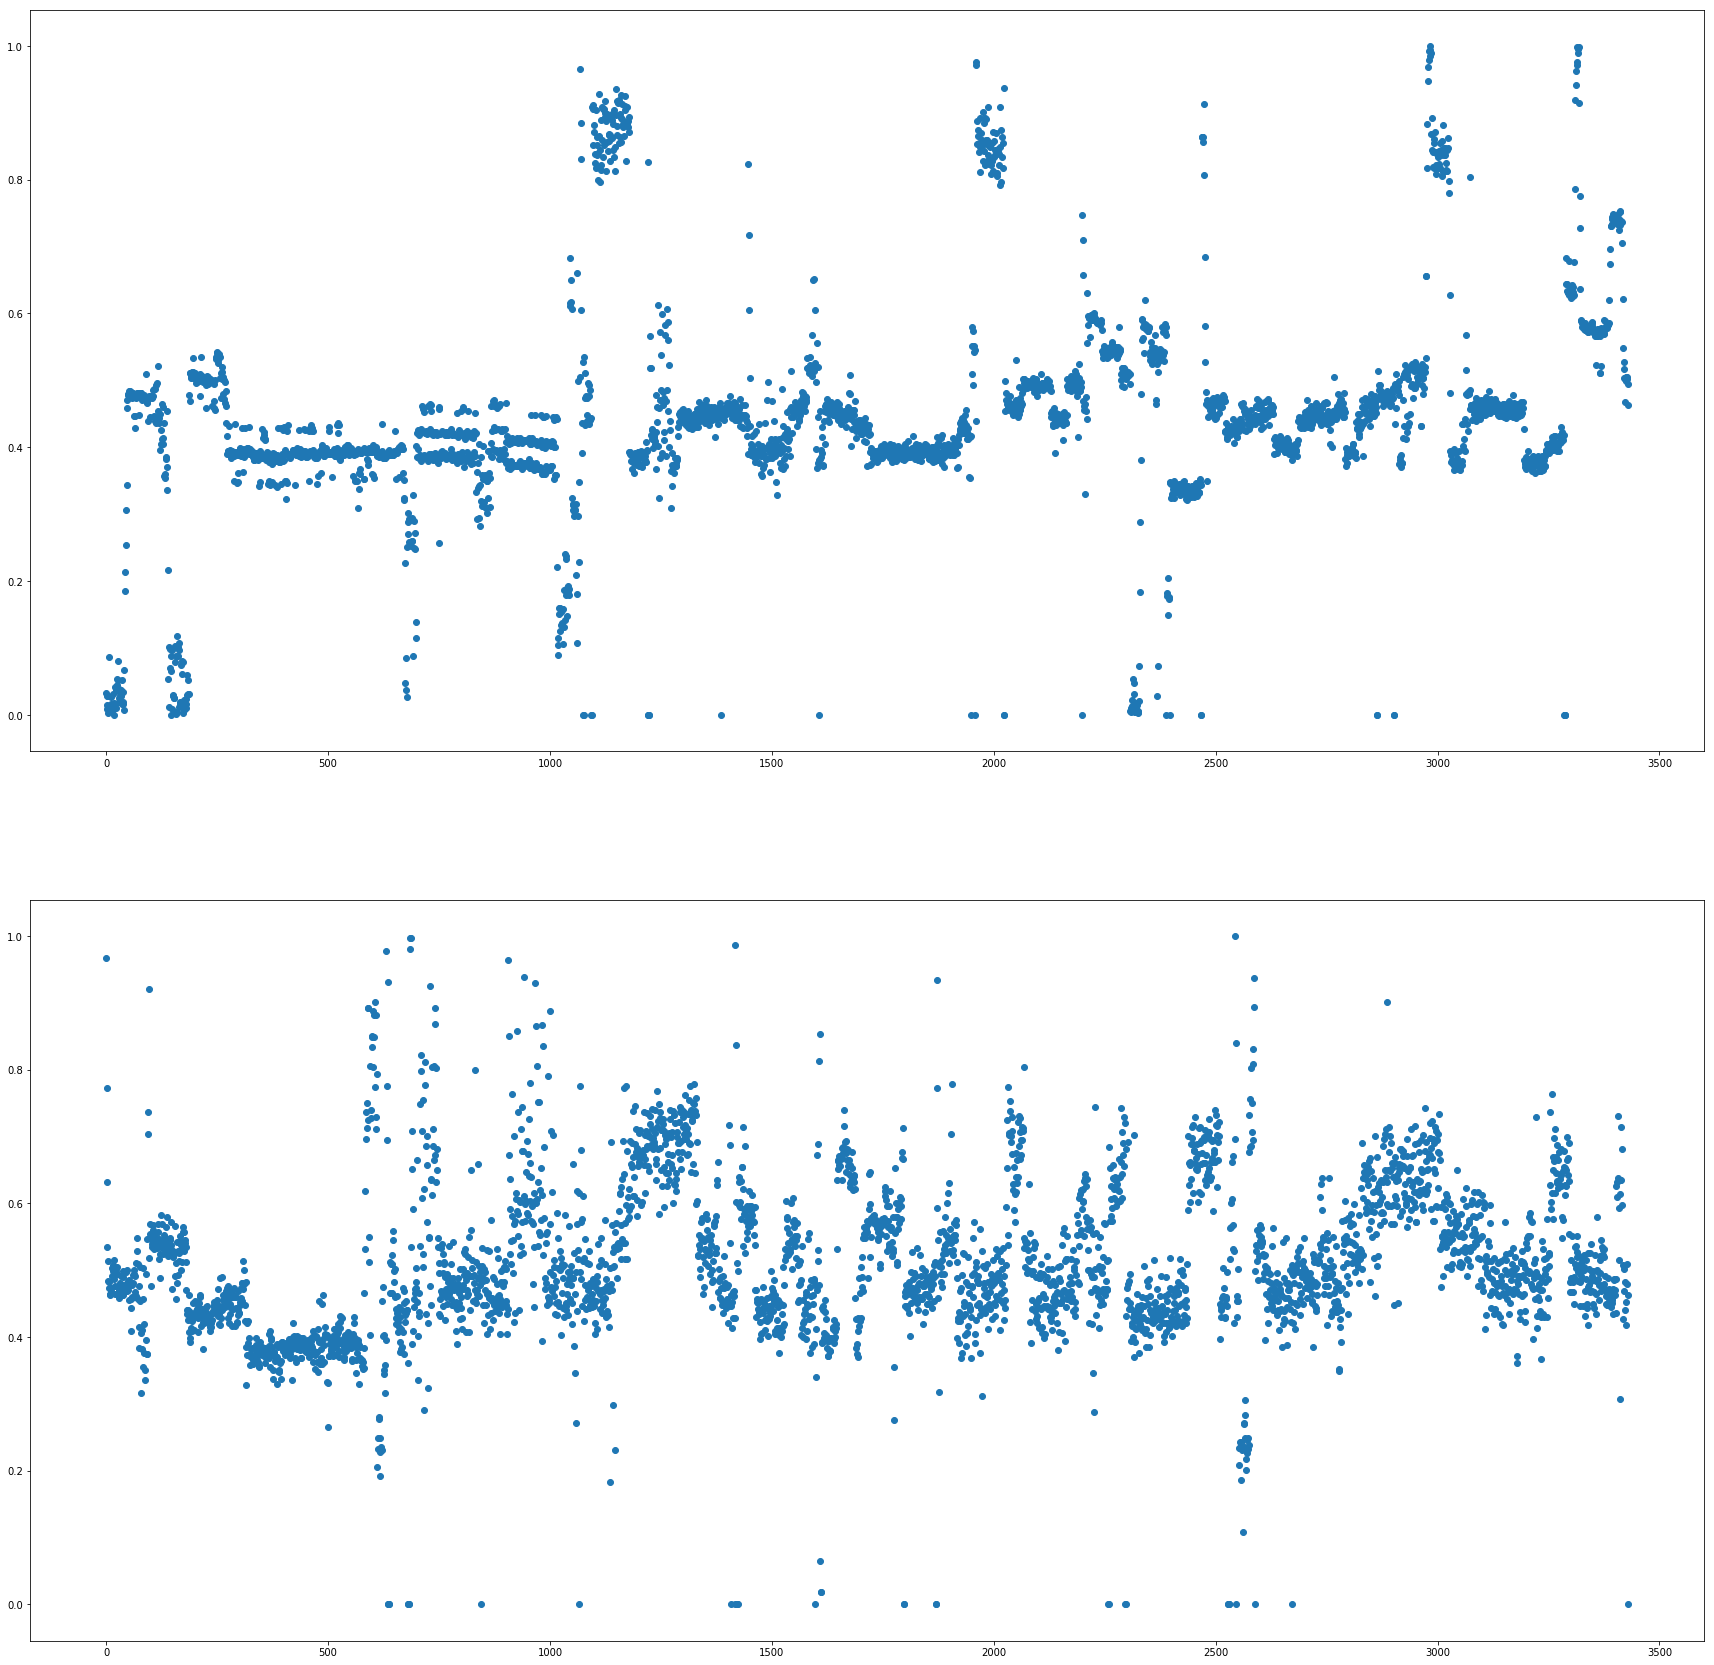

In [64]:
PlotGazePosition('Novi_503_RawData_06-19-2017_16-54-31-0888.dat').plot_data()

In [117]:
pgp1=PlotGazePosition('RawData_01-29-2018_16-18-41-2670.dat')

Length of X is 12479; length of Y is 12145


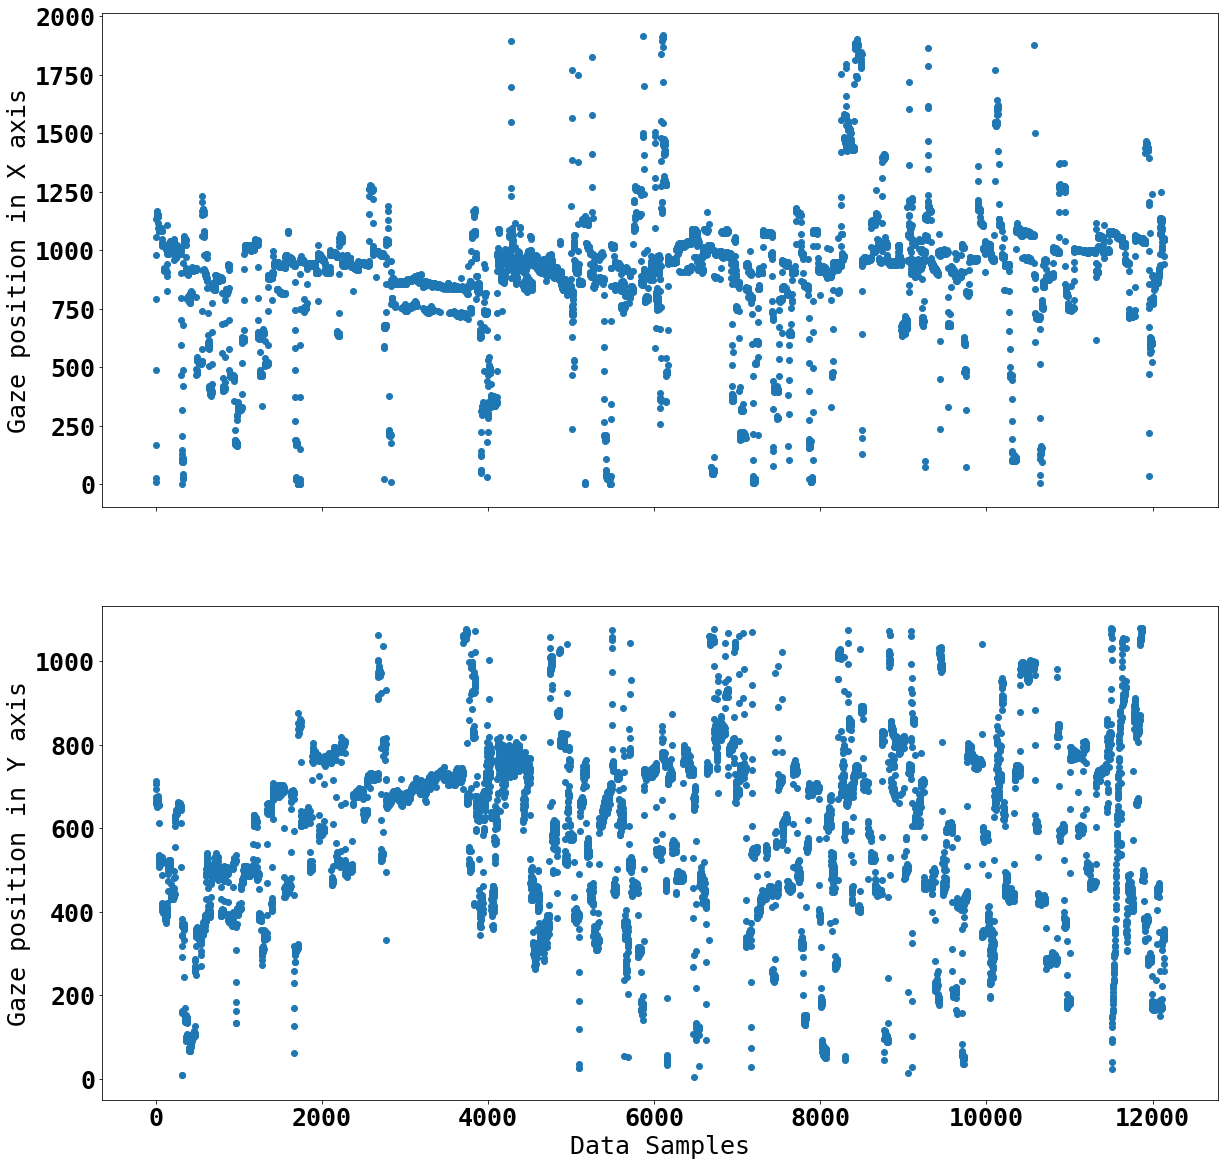

In [118]:
pgp1.plot_data()

In [74]:
x_

array([0.0330582 , 0.00922805, 0.02857256, ..., 0.8646816 , 0.9268929 ,
       0.8883594 ])

In [75]:
y_

array([9.664510e-01, 7.723118e-01, 6.311229e-01, ..., 4.790903e-01,
       4.630064e-01, 1.401298e-45])

In [88]:
img = image.imread('native_stimulus.png')

In [103]:
roix = pgp1.gazeX[4100:4400]
roiy = pgp1.gazeY[4100:4400]

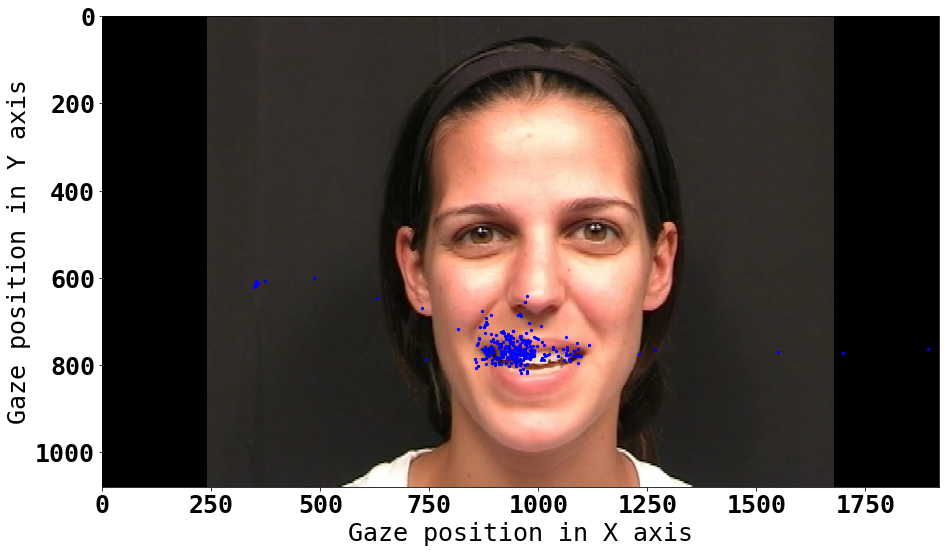

In [115]:
fig, ax=plt.subplots(figsize=(15,15))
ax.imshow(img)
ax.scatter(roix, roiy, s=5.0, c='b')
ax.set_xlabel('Gaze position in X axis')
ax.set_ylabel('Gaze position in Y axis')
fig.savefig('mouse.png', bbox_inches='tight')